# Setting up connection to kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# upload the kaggle.json file in order to get data from kaggle API
from google.colab import files
token = files.upload()

In [0]:
import os
os.chdir(r'/content/drive/My Drive/FinalProject')

In [0]:
!mkdir /root/.kaggle/

In [0]:
!cp kaggle.json /root/.kaggle/

In [0]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 9.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [0]:
!pip uninstall kaggle 

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.6/dist-packages/kaggle-1.5.6.dist-info/*
    /usr/local/lib/python3.6/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.6


In [0]:
!pip install kaggle==1.5.6

     |████████████████████████████████| 58 kB 4.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=fe24f072a5976289d3a797ef307f4a41757b1c9b73d752613774395b96097adb
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle


In [0]:
!kaggle --version

Kaggle API 1.5.6


In [0]:
# upload the dataset to the directory
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [03:46<00:00, 51.6MB/s]
100% 9.51G/9.51G [03:47<00:00, 45.0MB/s]


# Preprocessing

In [0]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pickle

In [0]:
# !unzip -o 'aptos2019-blindness-detection.zip' -d data/

In [4]:
!pwd

/content/drive/My Drive/FinalProject


In [0]:
PATH = '/content/drive/My\ Drive/FinalProject/data/'

In [0]:
# read the data - first the csv files 
df_train = pd.read_csv('data/train.csv') # dataframe of id_code and diagnosis
df_test = pd.read_csv('data/test.csv')

In [0]:
# let us determine the input (x) and output (y) from training dataset 
# x will be the images
# y will be the diagnosis
X = df_train['id_code']
y = df_train['diagnosis']

In [0]:
# add the entire path to the dataframe column id_code
X = X.apply(lambda x: 'data/train_images/' + x + '.png')

In [0]:
# shuffle the data
X, y = shuffle(X, y, random_state=0)

In [10]:
X[:5]

2596    data/train_images/b460ca9fa26f.png
1548    data/train_images/6cee2e148520.png
2912    data/train_images/ca6842bfcbc9.png
1544    data/train_images/6cbc3dad809c.png
2438    data/train_images/a9bc2f892cb3.png
Name: id_code, dtype: object

In [49]:
y[:5]

2596    0
1548    0
2912    1
1544    2
2438    0
Name: diagnosis, dtype: int64

In [0]:
# separate train and validation set 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20) # 2929 images for training and 733 for validation

In [54]:
X_train.shape, y_train.shape

((2929,), (2929,))

In [55]:
X_valid.shape, y_valid.shape

((733,), (733,))

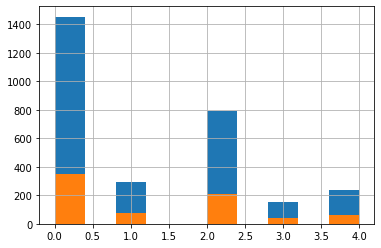

In [56]:
# investigate the distribution of the data (diagnosis)
y_train.hist()
y_valid.hist()

In [0]:
# let's have a look at the images now 
def display_img(df, col=4, rows=3):
    fig = plt.figure(figsize=(25,16))
    for i in range(col*rows):
        img_path = df.loc[i, 'id_code']
        img_diag = df.loc[i, 'diagnosis']
        img = cv2.imread(f'data/train_images/{img_path}.png')

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        fig.add_subplot(rows, col, i+1)
        plt.title(img_diag)
        plt.imshow(img)

    plt.tight_layout()

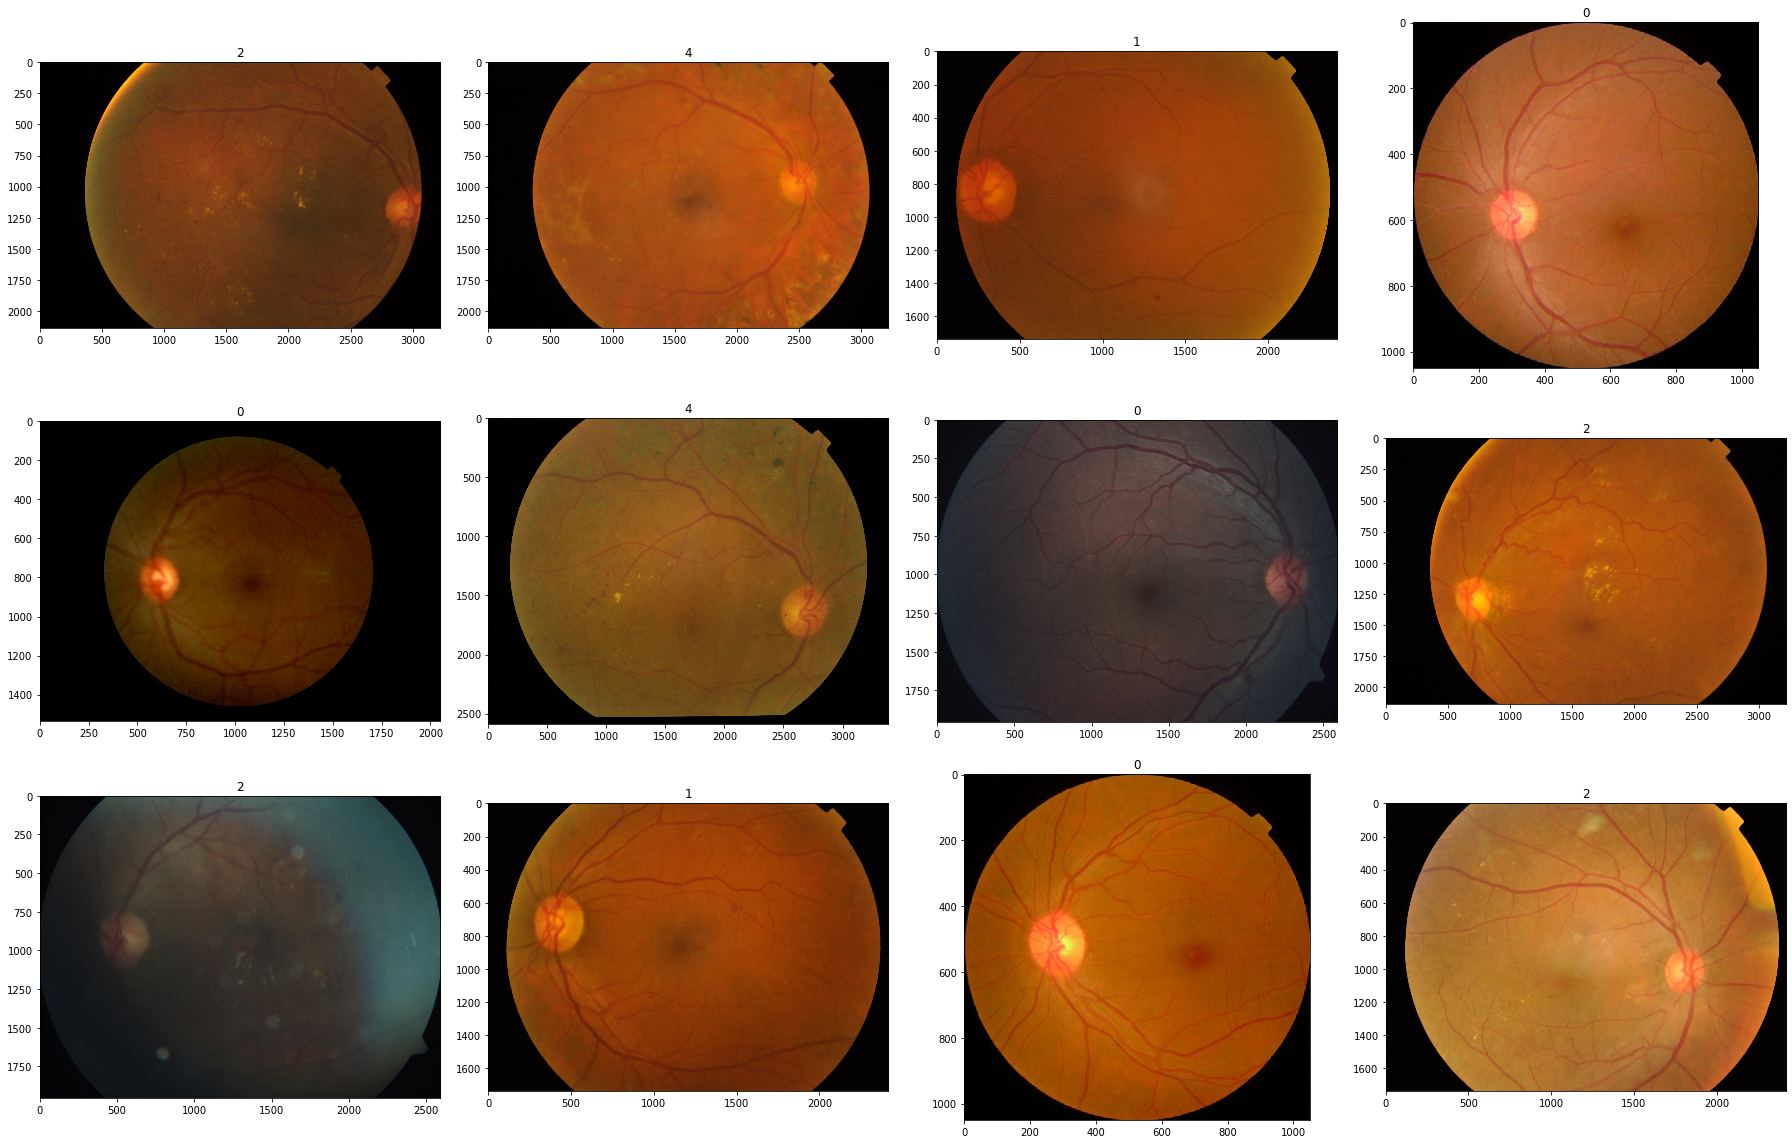

In [58]:
display_img(df_train)

We can see that the images are very large. The lighting and the quality differ from each images. 

In [0]:
 def to_matrix(series):
  tmp = []
  for img in series:
    # read the image and append it to the training/validation array
    matrix = cv2.imread(img)
    resized = cv2.resize(matrix, (512,512))
    tmp.append(resized)
  return np.array(tmp)

In [0]:
X = to_matrix(X)

In [0]:
# X = to_matrix(X)
y = y.to_numpy()

In [0]:
# save the matrix inside a pickle file 
pickle.dump(X, open('./data.pkl', 'wb'))

In [24]:
X.shape

(3662, 512, 512, 3)

In [0]:
X = pickle.load(open('./data.pkl', 'rb'))

In [0]:
def show_single_picture(img):
    """ Plot an image """
    cv2_imshow(img)

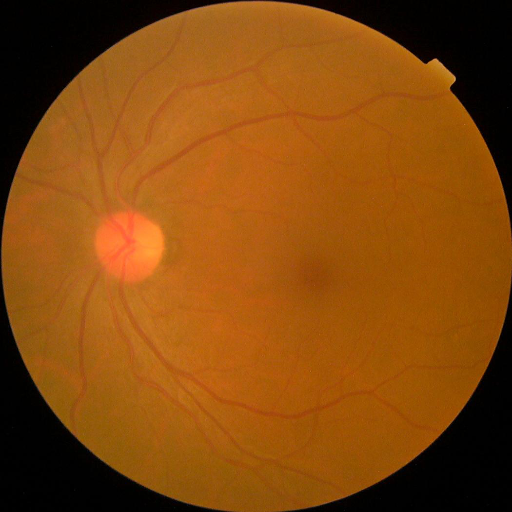

In [27]:
show_single_picture(X[0])

In [22]:
X[0].shape

(512, 512, 3)

In [90]:
X_train[0].shape

(64, 64, 3)

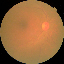

In [91]:
show_single_picture(X_train[0])

In [0]:
X_train = to_matrix(X_train)
y_train = y_train.to_numpy()
X_valid = to_matrix(X_valid)
y_valid = y_valid.to_numpy()

# Model


In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import datetime
from sklearn.model_selection import train_test_split
import pandas as pd 

# Using pre-trained models
from keras.applications import VGG16, VGG19, InceptionResNetV2, Xception, NASNetLarge
from keras import datasets, optimizers
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# Initialize optimizer
learning_rate = 1e-3
optimizer = optimizers.SGD(lr=learning_rate, momentum=0.9)

In [0]:
image_size = 512
num_channels = 3

In [31]:
# VGG 16 
# Create a model using pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(image_size, image_size, num_channels)), pooling='avg') # assumes data_format = "channels_last"

# Add a global spatial average pooling layer
top_network = base_model.output
# Add a fully-connected layer    
top_network = Dense(128, activation='relu')(top_network)
# Add a Dropout layer
top_network = Dropout(0.25)(top_network)
# Add a fully-connected layer    
top_network = Dense(64, activation='relu')(top_network)
# Add a logistic layer with 10 classes
top_network = Dense(5, activation='softmax')(top_network)

# Create model
model = Model(inputs=base_model.input, outputs=top_network)

# Compile the model (should be done ***after*** setting layers to non-trainable)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# Print a summary of the model
model.summary()





58892288/58889256 [==============================] - 6s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
________________________________________________________________

In [32]:
history = model.fit(x=X, y=y, epochs=30, validation_split=0.2,shuffle=True, use_multiprocessing=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2929 samples, validate on 733 samples
Epoch 1/30
2929/2929 [==============================] - 299s 102ms/step - loss: 0.8986 - acc: 0.6832 - val_loss: 0.6961 - val_acc: 0.7613
Epoch 2/30
2929/2929 [==============================] - 253s 86ms/step - loss: 0.7317 - acc: 0.7392 - val_loss: 0.6288 - val_acc: 0.7722
Epoch 3/30
2929/2929 [==============================] - 254s 87ms/step - loss: 0.6448 - acc: 0.7579 - val_loss: 0.5584 - val_acc: 0.7872
Epoch 4/30
2929/2929 [==============================] - 254s 87ms/step - loss: 0.6136 - acc: 0.7689 - val_loss: 0.5234 - val_acc: 0.7899
Epoch 5/30
2929/2929 [==============================] - 254s 87ms/step - loss: 0.5796 - acc: 0.7839 - val_loss: 0.6178 - val_acc: 0.7790
Epoch 6/30
2929/2929 [==============================] - 254s 87ms/step - loss: 0.5438 - acc: 0.7965 - val_loss: 0.5050 - val_acc: 0.7913
Epoch 7/30
2929/2929 [============

In [0]:
# save the trained model 
model.save('VGG16.h5')

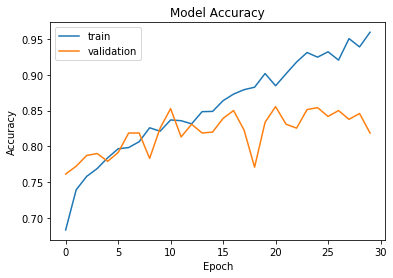

In [35]:
# Plot history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()